## Titanic - Machine Learning from Disaster

#### Competition website: https://www.kaggle.com/c/titanic/overview
All data files are from the competition site.

### Overview

This is the legendary Titanic ML competition – the best, first challenge for you to dive into ML competitions and familiarize yourself with how the Kaggle platform works.

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

placement result: 0.77

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings                  # Suppress notebook warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv(r'train.csv')
test_df = pd.read_csv(r'test.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
for col in df.columns:
    print(col, df[col].dtype)

PassengerId int64
Survived int64
Pclass int64
Name object
Sex object
Age float64
SibSp int64
Parch int64
Ticket object
Fare float64
Cabin object
Embarked object


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
# Correlation of numeric values 
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


#### The highest numeric correlation with 'Survived' is 'Fare' and 'Fare' is correlated with 'Pclass', 'Spouse and siblings' and 'parents and children' variables

In [9]:
# Make a df copy for experimenting
edf = df.copy()

In [10]:
# Let's drop Age and Cabin columns since they have a lot of missing values
edf.drop(['Age', 'Cabin'], axis = 1, inplace = True)
test_df.drop(['Age', 'Cabin'], axis = 1, inplace = True)

## Categorical Variables

### Sex Analysis

In [11]:
# Ratio of males to all passengers
len(edf[edf['Sex'] == 'male'])/len(edf)

0.6475869809203143

In [12]:
# Almost twice as many females survived
edf.Sex[edf['Survived'] == 1].value_counts()

female    233
male      109
Name: Sex, dtype: int64

### Ticket Analysis

In [13]:
edf['Ticket'].value_counts()

347082             7
CA. 2343           7
1601               7
CA 2144            6
347088             6
                  ..
S.C./A.4. 23567    1
19952              1
A/5. 851           1
244373             1
347081             1
Name: Ticket, Length: 681, dtype: int64

In [14]:
# Let's drop the Ticket column because it might contain data that links to the target
edf.drop(['Ticket'], axis = 1, inplace = True)
test_df.drop(['Ticket'], axis = 1, inplace = True)

### Embarked Analysis

In [15]:
edf['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [16]:
# Who survived?
edf.Embarked[edf['Survived']==1].value_counts()

S    217
C     93
Q     30
Name: Embarked, dtype: int64

In [17]:
# Who did not survive?
edf.Embarked[edf['Survived']==0].value_counts()

S    427
C     75
Q     47
Name: Embarked, dtype: int64

#### With only three classes, we can safely impute Embarked

In [18]:
# The two NaN values in Embarked can be dropped 
edf.dropna(inplace = True)
test_df.fillna(method ='backfill', inplace = True)

In [19]:
edf.drop(['Name'], axis = 1, inplace = True)
test_df.drop(['Name'], axis = 1, inplace = True)

In [20]:
edf

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,1,0,3,male,1,0,7.2500,S
1,2,1,1,female,1,0,71.2833,C
2,3,1,3,female,0,0,7.9250,S
3,4,1,1,female,1,0,53.1000,S
4,5,0,3,male,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,887,0,2,male,0,0,13.0000,S
887,888,1,1,female,0,0,30.0000,S
888,889,0,3,female,1,2,23.4500,S
889,890,1,1,male,0,0,30.0000,C


### The categorical columns that we'll keep: Sex, Embarked

## Numerical Data 

### Pclass Analysis

In [21]:
# How many passengers in each class?
edf['Pclass'].value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

In [22]:
# (Pclass, survived) List
s = edf.Pclass[edf['Survived'] == 1].value_counts()
s = list(zip(s.index, s))
s.sort(key = lambda x :x[0])
s

[(1, 134), (2, 87), (3, 119)]

In [23]:
# (Pclass, did not survive) List
ns = edf.Pclass[edf['Survived'] == 0].value_counts()
ns = list(zip(ns.index, ns))
ns.sort(key = lambda x: x[0])
ns

[(1, 80), (2, 97), (3, 372)]

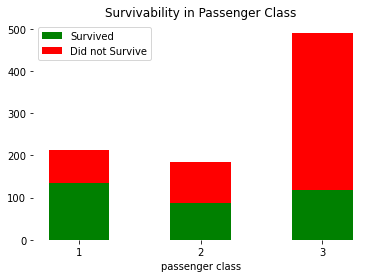

In [24]:
# Let's visualize this 
fig, ax = plt.subplots()
x = np.arange(1,4)
ax.bar(x, height = [x[1] for x in s], width = 0.5 ,color = 'green', label = 'Survived')
ax.bar(x, height = [x[1] for x in ns], width = 0.5, bottom = [x[1] for x in s], color = 'red', label = 'Did not Survive')
ax.set_xlabel('passenger class')
ax.set_xticks(x)
ax.legend()
ax.set_title('Survivability in Passenger Class')
for spine in plt.gca().spines.values():
    spine.set_visible(False)

### SibSp Analysis

In [25]:
# (Number of Siblings/spouse, survived)
s = edf.SibSp[edf['Survived'] == 1].value_counts()
s = list(zip(s.index, s))
s.sort(key = lambda x: x[0])
# Append missing values
for i in range (5,9):
    s.append((i,0))
s

[(0, 208), (1, 112), (2, 13), (3, 4), (4, 3), (5, 0), (6, 0), (7, 0), (8, 0)]

In [26]:
# (Number of Siblings/spouse, did not survived)
ns = edf.SibSp[edf['Survived'] == 0].value_counts()
ns = list(zip(ns.index, ns))
ns.sort(key = lambda x: x[0])
# Append missing values
for i in [6,7]:
    ns.append((i, 0))
ns

[(0, 398), (1, 97), (2, 15), (3, 12), (4, 15), (5, 5), (8, 7), (6, 0), (7, 0)]

Text(0.5, 0, 'Number of siblings/spouse')

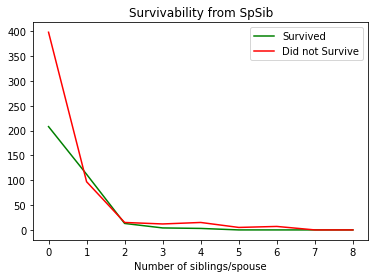

In [27]:
fig, ax = plt.subplots()
x = np.arange(0,9)
ax.plot(x, [x[1] for x in s], label = 'Survived', color = 'green')
ax.plot(x, [x[1] for x in ns], label = 'Did not Survive', color = 'red')
ax.legend()
ax.set_title('Survivability from SpSib')
ax.set_xlabel('Number of siblings/spouse')

#### We can see that as df.corr() implied, the number of siblings/spouse is negateively correlated with survivability

### Parch (Parent/children) Analysis

In [28]:
edf['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [29]:
s = edf.Parch[edf['Survived'] == 1].value_counts()
s = list(zip(s.index, s))
for i in [4,6]:
    s.append((i,0))
s.sort(key = lambda x: x[0])
s

[(0, 231), (1, 65), (2, 40), (3, 3), (4, 0), (5, 1), (6, 0)]

In [30]:
ns = edf.Parch[edf['Survived'] == 0].value_counts()
ns = list(zip(ns.index, ns))
ns.sort(key = lambda x: x[0])
ns

[(0, 445), (1, 53), (2, 40), (3, 2), (4, 4), (5, 4), (6, 1)]

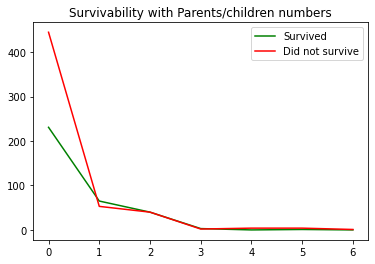

In [31]:
fig, ax = plt.subplots()
x = np.arange(0,7)
ax.plot(x, [x[1] for x in s], color = 'green', label = 'Survived')
ax.plot(x, [x[1] for x in ns], color = 'red', label = 'Did not survive')
ax.set_title('Survivability with Parents/children numbers')
ax.legend()

### Fare Analysis

In [32]:
edf.Fare.mean()

32.09668087739029

In [33]:
# Survival if Fare is more than the mean of Fare
edf.Survived[edf['Fare'] > edf.Fare.mean()].value_counts()

1    124
0     85
Name: Survived, dtype: int64

In [34]:
# Survival if Fare is less than the mean
edf.Survived[edf['Fare'] < edf.Fare.mean()].value_counts()

0    464
1    216
Name: Survived, dtype: int64

### Preparing for model

In [35]:
edf.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [36]:
features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']
y_train = edf[['Survived']]
X_train = edf[features]

X_test = test_df[features]

In [37]:
# Define categorical and numerical columns
cat_cols = [colname for colname in X_train.columns if X_train[colname].dtype in ['object']]
cat_cols

['Sex', 'Embarked']

In [38]:
numeric_cols = [colname for colname in X_train.columns if X_train[colname].dtype in ['int64', 'float64']]
numeric_cols

['Pclass', 'SibSp', 'Parch', 'Fare']

In [39]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [40]:
X_train

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,male,1,0,7.2500,S
1,1,female,1,0,71.2833,C
2,3,female,0,0,7.9250,S
3,1,female,1,0,53.1000,S
4,3,male,0,0,8.0500,S
...,...,...,...,...,...,...
886,2,male,0,0,13.0000,S
887,1,female,0,0,30.0000,S
888,3,female,1,2,23.4500,S
889,1,male,0,0,30.0000,C


In [41]:
# Preprocessing for categorical data / One Hot Encode
enc = OneHotEncoder(handle_unknown = 'ignore', sparse = False)
OH_train_cols = pd.DataFrame(enc.fit_transform(X_train[cat_cols]))
OH_test_cols = pd.DataFrame(enc.transform(X_test[cat_cols]))

OH_train_cols.index = X_train.index
OH_test_cols.index = X_test.index

X_train = X_train.drop(columns = cat_cols, axis = 1)
X_test = X_test.drop(cat_cols, axis = 1)

OH_X_train = pd.concat([X_train, OH_train_cols], axis = 1)
OH_X_test = pd.concat([X_test, OH_test_cols], axis = 1)

In [42]:
OH_X_train

,Pclass,SibSp,Parch,Fare,0,1,2,3,4
0,3,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
2,3,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
4,3,0,0,8.0500,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,2,0,0,13.0000,0.0,1.0,0.0,0.0,1.0
887,1,0,0,30.0000,1.0,0.0,0.0,0.0,1.0
888,3,1,2,23.4500,1.0,0.0,0.0,0.0,1.0
889,1,0,0,30.0000,0.0,1.0,1.0,0.0,0.0


In [43]:
# Scale the data
scaler = MinMaxScaler()
scaler = scaler.fit(OH_X_train)
X_train_scaled = scaler.transform(OH_X_train)
X_test_scaled = scaler.transform(OH_X_test)

In [44]:
# Start the model
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 500, max_features = 5, random_state = 0)

In [46]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest, X_train_scaled, y_train.values.ravel(), cv = 5, scoring = 'accuracy')

print(f'Forest Model Training Score: {np.mean(scores)}')

Forest Model Training Score: 0.7919443915444677


In [47]:
forest.fit(X_train_scaled, y_train)

RandomForestClassifier(max_features=5, n_estimators=500, random_state=0)

In [48]:
predictions = forest.predict(X_test_scaled)

In [49]:
len(predictions)

418

In [50]:
result = pd.DataFrame({'survived': predictions}, index = test_df['PassengerId'])
result

,survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [51]:
result.to_csv(r'final_result.csv')

## Thank you for reading. Any comment is welcome.